Total Reward:
2605


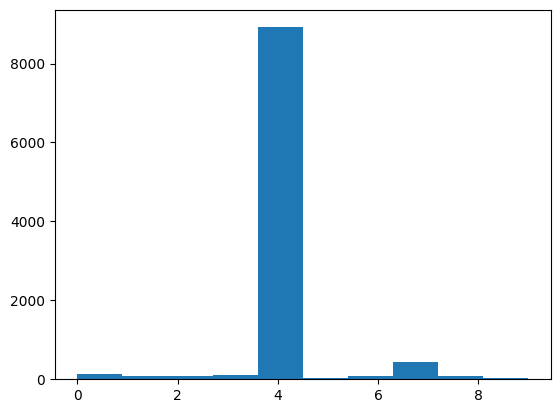

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('../datasources/Ads_CTR_Optimisation.csv')
#print(data)

#Random Selection
'''
import random

N=10000
d=10
sum=0
selects=[]
for n in range(0,N):
    ad=random.randrange(d)
    selects.append(ad)
    award=data.values[n,ad]
    sum=sum+award
    
plt.hist(selects)
plt.show()
'''
import random
#Thompson Sampling

N = 10000 # 10.000 click
d = 10  # There are 10 ads in total
#Ni(n)
sum = 0 # total reward
selects = []
ones=[0]*d
zeros=[0]*d
for n in range(1,N):
    ad = 0 #selected ad
    max_thompson = 0
    for i in range(0,d):
        randombeta=random.betavariate(ones[i]+1,zeros[i]+1)
        if randombeta > max_thompson:
            max_thompson=randombeta
            ad=i
    selects.append(ad)
    award = data.values[n,ad] # n in the data. if row = 1 the reward is 1
    if award == 1:
        ones[ad]= ones[ad] + 1
    else : 
        zeros[ad]=zeros[ad]+1
    sum = sum+ award
print('Total Reward:')   
print(sum)

plt.hist(selects)
plt.show()
